In [6]:
#import packages


#essentials
import pandas as pd
import numpy as np
import os
from Bio import SeqIO

#pairwise distances
import Levenshtein as lv

#clustering
from sklearn.manifold import TSNE
from sklearn.manifold import MDS

#for plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

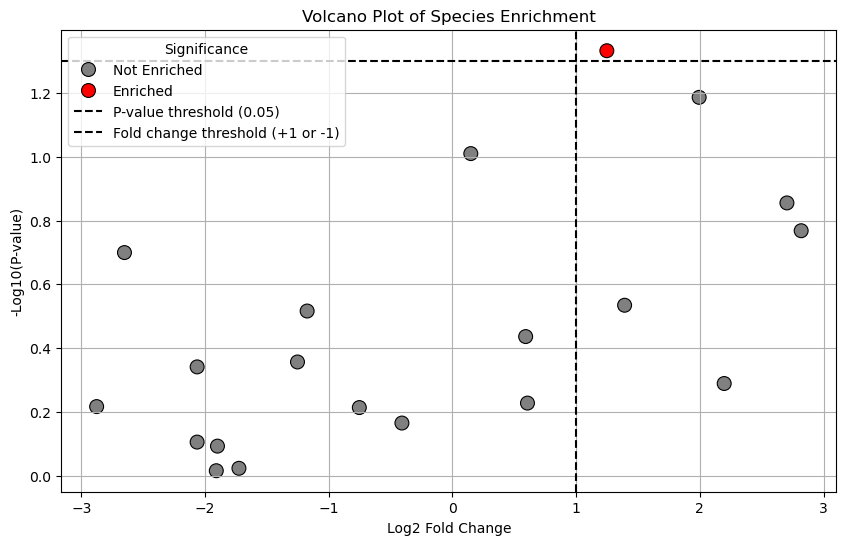

In [10]:
#list all files containing the sequences (they should be fasta files)

fasta_files = [f for f in os.listdir() if f.endswith('.txt')] # list comprehension

fasta_files

#create table with the sequences and their IDs

from Bio import SeqIO

all_data = []

for fasta_file in fasta_files:

    records = list(SeqIO.parse(fasta_file, "fasta"))
    data = {'filename': os.path.basename(fasta_file),
            'sequence_id': [record.id for record in records],
           'sequence': [str(record.seq) for record in records]}
    all_data.append(pd.DataFrame(data))

start_df = pd.concat(all_data, ignore_index=True) #put the table in the correct format

start_df = start_df.sort_values(by='sequence_id') #sort values by sequence ID

start_df

,filename,sequence_id,sequence
473,normalised.fulldataset_all_DC13_sequences_full...,10668.g605,MGTGSSTPSVPKDVKNESHKSARNILEGFAKDIKRDVSNEAQKRAY...
474,normalised.fulldataset_all_DC13_sequences_full...,10936.g229,MGGNSSKGAPTYYTNESEKSARNVLENFAKDIKGKASNDAKKKGIS...
458,normalised.fulldataset_all_DC13_sequences_full...,3D7-1150400,MGNAIPATPDPIFINESYKSARNVLENVARLIKAKATKDVKRHRNV...
475,normalised.fulldataset_all_DC13_sequences_full...,6816.g324,MGGNSSKGAPTYYTNESEKSARNVLEGFAKDIRNKAENDAKKYASS...
476,normalised.fulldataset_all_DC13_sequences_full...,8383.g469,MGGNSSKVAPTYFTNESHNSTRNVLEGLAKGIKEDIYKNAKKKGSS...
...,...,...,...
2301,normalised.fulldataset_all_DC13_sequences_full...,SenT232.08.g335,MGGNSSKGAPTYYTNESHNSTRNVLEGLAKGIKDDIYKNANKKRSS...
2302,normalised.fulldataset_all_DC13_sequences_full...,SenV042.05.g324,SSKVAPTYFTNESHNSTRNVLEGLAKGIKDDIYKNANKKRSSLKGN...
2303,normalised.fulldataset_all_DC13_sequences_full...,SenV042.05.g420,MGGNASSFSKTVVGNETHKSARNILDVLAHDIRNKAENDAKNYASS...
2304,normalised.fulldataset_all_DC13_sequences_full...,SenV042.05.g56,MGSSASKFSKTVVGNETHNSARNVLEKIALETKGDINVKANLYKDK...


In [11]:
#create a table for the metadata 


metadata_df = pd.read_csv("normalised.fulldataset.DC13_metadata_genes.csv").sort_values(by='Sample_ID') 

metadata_df = metadata_df.rename(columns={'Sample_ID': 'sequence_id'}) #should match the column from start_df

metadata_df

,sequence_id,Genome,Study,Country,Region,Year,Accession,Database,Continent,Subtype
0,10668.g605,10668,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1
1,10936.g229,10936,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb3
2,3D7-1150400,NaN,NaN,NaN,NaN,1987.0,GCA_000002765,PlasmoDB,Africa,head structure with DBLb3
3,6816.g324,6816,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1
4,8383.g469,8383,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1
...,...,...,...,...,...,...,...,...,...,...
2301,SenT232.08.g335,SenT232.08,Broad Senegal,Senegal,Thies,2008.0,SRS119084,varDB,Africa,head structure with DBLg11
2302,SenV042.05.g324,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1
2303,SenV042.05.g420,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1
2304,SenV042.05.g56,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1


In [13]:
# Merge the dataframes
structure_df = pd.read_csv('normalised.fulldataset.all_DC13_matched_pattern.csv')
df = metadata_df.merge(structure_df, on='sequence_id', how='inner')
df

,sequence_id,Genome,Study,Country,Region,Year,Accession,Database,Continent,Subtype,domain_structure
0,10668.g605,10668,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLg2-DBLg6-DBLg11
1,10936.g229,10936,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb3,DBLa1.7-CIDRa1.4-DBLb3-DBLb9-DBLg11-DBLg9-DBLd...
2,3D7-1150400,NaN,NaN,NaN,NaN,1987.0,GCA_000002765,PlasmoDB,Africa,head structure with DBLb3,DBLa1.7-CIDRa1.4-DBLb3-DBLb6-DBLd3-CIDRg2-
3,6816.g324,6816,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg2-DBLd1...
4,8383.g469,8383,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6
...,...,...,...,...,...,...,...,...,...,...,...
2301,SenT232.08.g335,SenT232.08,Broad Senegal,Senegal,Thies,2008.0,SRS119084,varDB,Africa,head structure with DBLg11,DBLa1.7-CIDRa1.4-DBLg11-DBLb7-DBLg11-DBLd1-CIDRb5
2302,SenV042.05.g324,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg4-DBLd1...
2303,SenV042.05.g420,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6
2304,SenV042.05.g56,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb6-DBLd5-CIDRb4


In [35]:
# Print the columns and a few rows to check if 'domain_structure' exists after the merge
print("Columns after merge:", df.columns)
print("First few rows after merge:\n", df.head())

# Function to count the number of domains
def count_domains(domain_structure):
    if not domain_structure:
        return 0  # Handle empty domain structures
    domains = [domain for domain in domain_structure.split('-') if domain]
    return len(domains)

# Check if 'domain_structure' exists and apply the domain counting function
if 'domain_structure' in df.columns:
    df['domain_count'] = df['domain_structure'].apply(count_domains)
else:
    print("Error: 'domain_structure' column not found in the DataFrame!")

# Apply both filters together
# Applying count filter

df_filtered_DBLb1 = df[df['Subtype'] == 'head structure with DBLb1']  # First filter by Subtype
df_filtered = df_filtered_DBLb1[df_filtered_DBLb1['domain_count'] > 4]  # Then filter by domain_count

In [36]:
df_filtered

,sequence_id,Genome,Study,Country,Region,Year,Accession,Database,Continent,Subtype,domain_structure,domain_count
0,10668.g605,10668,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLg2-DBLg6-DBLg11,6
3,6816.g324,6816,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg2-DBLd1...,8
4,8383.g469,8383,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,7
8,Dd2-040005100,Dd2,Wellems_et_al_1988,SE_Asia,NaN,1988.0,GCA_900632045.1,PlasmoDB,Asia,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb6-DBLg11-DBLd1-CIDRg5-,7
9,GA01-010005600,GA01,Otto_et_al_2018,Gabon,Lambarene,2007.0,GCA_900632005.1,PlasmoDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLg2-DBLg6-DBLg11-DBLd...,8
...,...,...,...,...,...,...,...,...,...,...,...,...
2294,SenT142.11.g1040,SenT142.11,Broad Senegal,Senegal,Thies,2011.0,SRS399575,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb9-DBLg2-DBLg17,6
2299,SenT230.08.g292,SenT230.08,Broad Senegal,Senegal,Thies,2008.0,SRS119076,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb3-DBLg11-DBLg2-DBLd...,8
2302,SenV042.05.g324,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg4-DBLd1...,8
2303,SenV042.05.g420,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,7


In [45]:
from collections import Counter

# Define the sequence to search for
search_sequence = "DBLa1.7-CIDRa1.4-DBLb1"

# Filter rows where 'domain_structure' contains the sequence
filtered_rows = df_filtered[df_filtered['domain_structure'].str.contains(search_sequence, na=False)]
filtered_rows

,sequence_id,Genome,Study,Country,Region,Year,Accession,Database,Continent,Subtype,domain_structure,domain_count
0,10668.g605,10668,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLg2-DBLg6-DBLg11,6
3,6816.g324,6816,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg2-DBLd1...,8
4,8383.g469,8383,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,7
8,Dd2-040005100,Dd2,Wellems_et_al_1988,SE_Asia,NaN,1988.0,GCA_900632045.1,PlasmoDB,Asia,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb6-DBLg11-DBLd1-CIDRg5-,7
9,GA01-010005600,GA01,Otto_et_al_2018,Gabon,Lambarene,2007.0,GCA_900632005.1,PlasmoDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLg2-DBLg6-DBLg11-DBLd...,8
...,...,...,...,...,...,...,...,...,...,...,...,...
2294,SenT142.11.g1040,SenT142.11,Broad Senegal,Senegal,Thies,2011.0,SRS399575,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb9-DBLg2-DBLg17,6
2299,SenT230.08.g292,SenT230.08,Broad Senegal,Senegal,Thies,2008.0,SRS119076,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb3-DBLg11-DBLg2-DBLd...,8
2302,SenV042.05.g324,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg4-DBLd1...,8
2303,SenV042.05.g420,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,7


In [69]:
# Fixed this issue but leaving here for posterity, was calling unfiltered dataframe previously

# Define the search sequence
search_sequence = "DBLa1.7-CIDRa1.4-DBLb1"

# Filter rows where the search sequence appears
filtered_rows = df_filtered[df_filtered['domain_structure'].str.contains(search_sequence, na=False)]

# Extract sequences where 'DBLb1' is followed by a space (meaning nothing follows it)
incomplete_sequences = filtered_rows[filtered_rows['domain_structure'].str.contains(rf"{search_sequence}\s*$", na=False)]

# Display results
print(incomplete_sequences)

Empty DataFrame
Columns: [sequence_id, Genome, Study, Country, Region, Year, Accession, Database, Continent, Subtype, domain_structure, domain_count]
Index: []


In [70]:
# Ensure filtered_rows only contains rows where DBLb1 is followed by valid domains, no spaces
filtered_rows = df_filtered[df_filtered['domain_structure'].str.contains(search_sequence, na=False)]
filtered_rows = filtered_rows[~filtered_rows['domain_structure'].str.contains(rf"{search_sequence}\s*$", na=False)]
filtered_rows# Exclude incomplete sequences

,sequence_id,Genome,Study,Country,Region,Year,Accession,Database,Continent,Subtype,domain_structure,domain_count
0,10668.g605,10668,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLg2-DBLg6-DBLg11,6
3,6816.g324,6816,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg2-DBLd1...,8
4,8383.g469,8383,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,7
8,Dd2-040005100,Dd2,Wellems_et_al_1988,SE_Asia,NaN,1988.0,GCA_900632045.1,PlasmoDB,Asia,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb6-DBLg11-DBLd1-CIDRg5-,7
9,GA01-010005600,GA01,Otto_et_al_2018,Gabon,Lambarene,2007.0,GCA_900632005.1,PlasmoDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLg2-DBLg6-DBLg11-DBLd...,8
...,...,...,...,...,...,...,...,...,...,...,...,...
2294,SenT142.11.g1040,SenT142.11,Broad Senegal,Senegal,Thies,2011.0,SRS399575,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb9-DBLg2-DBLg17,6
2299,SenT230.08.g292,SenT230.08,Broad Senegal,Senegal,Thies,2008.0,SRS119076,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb3-DBLg11-DBLg2-DBLd...,8
2302,SenV042.05.g324,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg4-DBLd1...,8
2303,SenV042.05.g420,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,7


In [81]:
remaining_domains = []
subtypes_at_position_4 = []  # To store the corresponding subtype for each domain at position 4
invalid_count = 0  # To track how many rows don't have enough domains

for idx, structure in filtered_rows['domain_structure'].items():  # Use .items() to iterate over the column
    # Split the domain structure to extract individual domains
    domains_after = [domain for domain in structure.split('-') if domain]  # Split and filter empty strings
    
    # Ensure we have enough domains (at least 4)
    if len(domains_after) < 4:
        invalid_count += 1  # This case shouldn't occur based on earlier checks
    else:
        domain_at_position_4 = domains_after[3]  # Position 4 corresponds to index 3
        subtype_at_position_4 = filtered_rows.loc[idx, 'Subtype']  # Get the corresponding Subtype using loc
        remaining_domains.append(domain_at_position_4)
        subtypes_at_position_4.append(subtype_at_position_4)

# Debugging: How many rows did not have enough domains?
print(f"Total rows with insufficient domains (less than 4): {invalid_count}")
print(f"Total valid entries at position 4: {len(remaining_domains)}")

# Count occurrences of each domain at position 4
domain_counts = Counter(remaining_domains)

# Display the most common domains at position 4 along with their subtypes
domain_and_subtype_counts = pd.DataFrame({
    'Domain': remaining_domains,
    'Subtype': subtypes_at_position_4
})

# Now, let's group by the domain and count occurrences, also including the subtypes in the output.
domain_and_subtype_summary = domain_and_subtype_counts.groupby(['Domain', 'Subtype']).size().reset_index(name='Count')

# Display the table with the count and subtypes
print(domain_and_subtype_summary)

# Optionally, display the most common domains at position 4
print("Most common domains at position 4 after the sequence:")
print(domain_counts.most_common(10))  # Show top 10 most common domains


Total rows with insufficient domains (less than 4): 0
Total valid entries at position 4: 1140
    Domain                    Subtype  Count
0   DBLb10  head structure with DBLb1      5
1   DBLb12  head structure with DBLb1      2
2   DBLb13  head structure with DBLb1      2
3    DBLb3  head structure with DBLb1    209
4    DBLb6  head structure with DBLb1    355
5    DBLb7  head structure with DBLb1    131
6    DBLb9  head structure with DBLb1     79
7   DBLg10  head structure with DBLb1     24
8   DBLg11  head structure with DBLb1    163
9   DBLg12  head structure with DBLb1     20
10  DBLg13  head structure with DBLb1     27
11  DBLg14  head structure with DBLb1      4
12   DBLg2  head structure with DBLb1     90
13   DBLg4  head structure with DBLb1      2
14   DBLg5  head structure with DBLb1     13
15   DBLg6  head structure with DBLb1     14
Most common domains at position 4 after the sequence:
[('DBLb6', 355), ('DBLb3', 209), ('DBLg11', 163), ('DBLb7', 131), ('DBLg2', 90), ('DBLb

In [83]:
remaining_domains = []
subtypes_at_position_4 = []  # To store the corresponding subtype for each domain at position 4
invalid_count = 0  # To track how many rows don't have enough domains

# Iterate over filtered rows and extract domain at position 4 and corresponding subtype
for idx, structure in filtered_rows['domain_structure'].items():
    # Split the domain structure to extract individual domains
    domains_after = [domain for domain in structure.split('-') if domain]  # Split and filter empty strings
    
    # Ensure we have enough domains (at least 4)
    if len(domains_after) < 4:
        invalid_count += 1  # This case shouldn't occur based on earlier checks
    else:
        domain_at_position_4 = domains_after[3]  # Position 4 corresponds to index 3
        subtype_at_position_4 = filtered_rows.loc[idx, 'Subtype']  # Get the corresponding Subtype using loc
        remaining_domains.append(domain_at_position_4)
        subtypes_at_position_4.append(subtype_at_position_4)

# Debugging: How many rows did not have enough domains?
print(f"Total rows with insufficient domains (less than 4): {invalid_count}")
print(f"Total valid entries at position 4: {len(remaining_domains)}")

# Now add the domain and subtype at position 4 back into the original filtered rows
filtered_rows['Domain_at_Position_4'] = remaining_domains
filtered_rows['Subtype_at_Position_4'] = subtypes_at_position_4

# Now filtered_rows contains all the original columns, with two new columns: 
# 'Domain_at_Position_4' and 'Subtype_at_Position_4'

# Display the updated DataFrame with the new columns
print(filtered_rows.head())  # Print the first few rows to check the updates

# Optionally, count occurrences of each domain at position 4
domain_counts = Counter(remaining_domains)

# Display the most common domains at position 4
print("Most common domains at position 4 after the sequence:")
print(domain_counts.most_common(10))  # Show top 10 most common domains


Total rows with insufficient domains (less than 4): 0
Total valid entries at position 4: 1140
      sequence_id Genome                Study  Country     Region    Year  \
0      10668.g605  10668                  NaN    Kenya        NaN     NaN   
3       6816.g324   6816                  NaN    Kenya        NaN     NaN   
4       8383.g469   8383                  NaN    Kenya        NaN     NaN   
8   Dd2-040005100    Dd2  Wellems_et_al_1988   SE_Asia        NaN  1988.0   
9  GA01-010005600   GA01      Otto_et_al_2018    Gabon  Lambarene  2007.0   

         Accession  Database Continent                    Subtype  \
0        ERS166381     varDB    Africa  head structure with DBLb1   
3        ERS166381     varDB    Africa  head structure with DBLb1   
4        ERS166381     varDB    Africa  head structure with DBLb1   
8  GCA_900632045.1  PlasmoDB      Asia  head structure with DBLb1   
9  GCA_900632005.1  PlasmoDB    Africa  head structure with DBLb1   

                            

In [84]:
filtered_rows

,sequence_id,Genome,Study,Country,Region,Year,Accession,Database,Continent,Subtype,domain_structure,domain_count,Domain_at_Position_4,Subtype_at_Position_4
0,10668.g605,10668,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLg2-DBLg6-DBLg11,6,DBLg2,head structure with DBLb1
3,6816.g324,6816,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg2-DBLd1...,8,DBLb7,head structure with DBLb1
4,8383.g469,8383,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,7,DBLb7,head structure with DBLb1
8,Dd2-040005100,Dd2,Wellems_et_al_1988,SE_Asia,NaN,1988.0,GCA_900632045.1,PlasmoDB,Asia,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb6-DBLg11-DBLd1-CIDRg5-,7,DBLb6,head structure with DBLb1
9,GA01-010005600,GA01,Otto_et_al_2018,Gabon,Lambarene,2007.0,GCA_900632005.1,PlasmoDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLg2-DBLg6-DBLg11-DBLd...,8,DBLg2,head structure with DBLb1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,SenT142.11.g1040,SenT142.11,Broad Senegal,Senegal,Thies,2011.0,SRS399575,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb9-DBLg2-DBLg17,6,DBLb9,head structure with DBLb1
2299,SenT230.08.g292,SenT230.08,Broad Senegal,Senegal,Thies,2008.0,SRS119076,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb3-DBLg11-DBLg2-DBLd...,8,DBLb3,head structure with DBLb1
2302,SenV042.05.g324,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg4-DBLd1...,8,DBLb7,head structure with DBLb1
2303,SenV042.05.g420,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,7,DBLb7,head structure with DBLb1


In [76]:
# Count occurrences of each domain at position 4
domain_counts = Counter(remaining_domains)

# Display the most common domains at position 4
print("Most common domains at position 4 after the sequence:")
print(domain_counts.most_common(10))  # Show top 10 most common domains

Most common domains at position 4 after the sequence:
[('DBLb6', 355), ('DBLb3', 209), ('DBLg11', 163), ('DBLb7', 131), ('DBLg2', 90), ('DBLb9', 79), ('DBLg13', 27), ('DBLg10', 24), ('DBLg12', 20), ('DBLg6', 14)]


In [115]:
# Keep only subtypes 'B' and 'C'
filtered_rows = filtered_rows[filtered_rows['Domain_at_Position_4'].isin(['DBLb6', 'DBLb3','DBLg11','DBLb7','DBLg2','DBLg6'])]
filtered_rows

,sequence_id,Genome,Study,Country,Region,Year,Accession,Database,Continent,Subtype,domain_structure,domain_count,Domain_at_Position_4,Subtype_at_Position_4
0,10668.g605,10668,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLg2-DBLg6-DBLg11,6,DBLg2,head structure with DBLb1
3,6816.g324,6816,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg2-DBLd1...,8,DBLb7,head structure with DBLb1
4,8383.g469,8383,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,7,DBLb7,head structure with DBLb1
8,Dd2-040005100,Dd2,Wellems_et_al_1988,SE_Asia,NaN,1988.0,GCA_900632045.1,PlasmoDB,Asia,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb6-DBLg11-DBLd1-CIDRg5-,7,DBLb6,head structure with DBLb1
9,GA01-010005600,GA01,Otto_et_al_2018,Gabon,Lambarene,2007.0,GCA_900632005.1,PlasmoDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLg2-DBLg6-DBLg11-DBLd...,8,DBLg2,head structure with DBLb1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,SenT130.11.g695,SenT130.11,Broad Senegal,Senegal,Thies,2011.0,SRS399542,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLg11-DBLg2,5,DBLg11,head structure with DBLb1
2299,SenT230.08.g292,SenT230.08,Broad Senegal,Senegal,Thies,2008.0,SRS119076,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb3-DBLg11-DBLg2-DBLd...,8,DBLb3,head structure with DBLb1
2302,SenV042.05.g324,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg4-DBLd1...,8,DBLb7,head structure with DBLb1
2303,SenV042.05.g420,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,7,DBLb7,head structure with DBLb1


In [82]:
import pandas as pd
from collections import Counter

# Convert Counter to DataFrame
df_counts = pd.DataFrame(domain_counts.most_common(), columns=['Domain', 'Count'])


# Display the table
print(df_counts)

total_count = df_counts['Count'].sum()
print(f"Total count of domains: {total_count}")


    Domain  Count
0    DBLb6    355
1    DBLb3    209
2   DBLg11    163
3    DBLb7    131
4    DBLg2     90
5    DBLb9     79
6   DBLg13     27
7   DBLg10     24
8   DBLg12     20
9    DBLg6     14
10   DBLg5     13
11  DBLb10      5
12  DBLg14      4
13   DBLg4      2
14  DBLb12      2
15  DBLb13      2
Total count of domains: 1140


In [129]:
df_filtered = filtered_rows

df_filtered = df_filtered.merge(start_df, on='sequence_id', how='inner')
df_filtered = df_filtered[df_filtered['Domain_at_Position_4'].isin(['DBLb6', 'DBLb3', 'DBLg11', 'DBLb7', 'DBLg2'])]
# Save the filtered DataFrame to a CSV file
df_filtered.to_csv("df_filtered_Dbla1.csv", index=False)
df_filtered

,sequence_id,Genome,Study,Country,Region,Year,Accession,Database,Continent,Subtype,domain_structure,domain_count,Domain_at_Position_4,Subtype_at_Position_4,filename,sequence
0,10668.g605,10668,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLg2-DBLg6-DBLg11,6,DBLg2,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGTGSSTPSVPKDVKNESHKSARNILEGFAKDIKRDVSNEAQKRAY...
1,6816.g324,6816,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg2-DBLd1...,8,DBLb7,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGGNSSKGAPTYYTNESEKSARNVLEGFAKDIRNKAENDAKKYASS...
2,8383.g469,8383,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,7,DBLb7,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGGNSSKVAPTYFTNESHNSTRNVLEGLAKGIKEDIYKNAKKKGSS...
3,Dd2-040005100,Dd2,Wellems_et_al_1988,SE_Asia,NaN,1988.0,GCA_900632045.1,PlasmoDB,Asia,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb6-DBLg11-DBLd1-CIDRg5-,7,DBLb6,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGGNSSKGAPTYYTNESEKSARNVLENFAKDIKGKASNDAKKKGIS...
4,GA01-010005600,GA01,Otto_et_al_2018,Gabon,Lambarene,2007.0,GCA_900632005.1,PlasmoDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLg2-DBLg6-DBLg11-DBLd...,8,DBLg2,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGSSASKFSKIVVGNETHKSARNVLERYAESIKQQAAADAEKCEKS...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,SenT130.11.g695,SenT130.11,Broad Senegal,Senegal,Thies,2011.0,SRS399542,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLg11-DBLg2,5,DBLg11,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGSQTSKFSKTVVGNETHNSARNVLEKIALETKGDINVKANKYEGK...
944,SenT230.08.g292,SenT230.08,Broad Senegal,Senegal,Thies,2008.0,SRS119076,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb3-DBLg11-DBLg2-DBLd...,8,DBLb3,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGTGSSTPSVPKDVKNESHKSARNVLDVLAEDIKKQAENKAQKHAR...
945,SenV042.05.g324,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg4-DBLd1...,8,DBLb7,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,SSKVAPTYFTNESHNSTRNVLEGLAKGIKDDIYKNANKKRSSLKGN...
946,SenV042.05.g420,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,7,DBLb7,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGGNASSFSKTVVGNETHKSARNILDVLAHDIRNKAENDAKNYASS...


In [130]:
#extract sequence info from the table
df_filtered
sequence_dict = dict(zip(df_filtered['sequence_id'], df_filtered['sequence'])) #create a dictionary which assigns each sequence to its sequence ID
sequence_ids = list(sequence_dict.keys()) #take out sequence IDs
sequences = list(sequence_dict.values()) #take out sequences

#create Levenshtein distance matrix
n = len(sequences)
lev_matrix = [[lv.distance(sequences[i], sequences[j]) for j in range(n)] for i in range(n)]
lev_matrix=pd.DataFrame(lev_matrix)

lev_matrix.to_csv("lev_matrix_Dblb1.csv", index=False)

In [131]:
sequence_dict = dict(zip(df_filtered['sequence_id'], df_filtered['sequence'])) #create a dictionary which assigns each sequence to its sequence ID

sequence_ids = list(sequence_dict.keys()) #take out sequence IDs
sequences = list(sequence_dict.values())

#sequence_ids
#sequences

In [132]:
#assign sequence IDs to columns and rows in the matrix

lev_matrix = pd.read_csv("lev_matrix_Dblb1.csv")
sequence_dict = dict(zip(df_filtered['sequence_id'], df_filtered['sequence'])) #create a dictionary which assigns each sequence to its sequence ID

sequence_ids = list(sequence_dict.keys()) #take out sequence IDs
sequences = list(sequence_dict.values()) #take out sequences

#lev_matrix = lev_matrix.set_index(lev_matrix.columns[0])

#sequence_ids = sequence_ids[:min_size]  # Trim sequence_ids if necessary
#lev_matrix = lev_matrix.iloc[:min_size, :min_size]  # Trim lev_matrix
 
    
df_filtered
lev_matrix

,0,1,2,3,4,5,6,7,8,9,...,938,939,940,941,942,943,944,945,946,947
0,0,2235,1915,1939,1899,2078,2191,1640,2003,1842,...,1540,1277,1619,2037,1850,1497,2155,2224,1829,1677
1,2235,0,2035,2036,2047,1853,1947,2205,2022,1900,...,2208,2380,2137,2034,2139,2322,1922,1911,2026,2271
2,1915,2035,0,1735,2045,1954,1993,1715,1747,1779,...,1889,1952,1857,1796,1411,1937,2021,1843,1706,1892
3,1939,2036,1735,0,1906,1893,1975,1868,1636,1634,...,1807,1970,1793,1957,1847,1957,1954,1969,1614,1808
4,1899,2047,2045,1906,0,1930,1734,2065,1815,1905,...,1996,2164,1829,1726,2158,2098,1891,1991,1937,2089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,1497,2322,1937,1957,2098,2039,2168,1583,1968,1886,...,1445,1356,1592,2099,1811,0,2006,2308,1865,1585
944,2155,1922,2021,1954,1891,1810,1766,2147,1902,1874,...,1874,2257,2044,1929,1972,2006,0,1918,1790,2047
945,2224,1911,1843,1969,1991,1851,1880,2168,1991,2001,...,2123,2256,2120,1928,1890,2308,1918,0,1983,2142
946,1829,2026,1706,1614,1937,1789,1804,1716,1633,1569,...,1693,1943,1754,2003,1860,1865,1790,1983,0,1695


In [133]:
lev_matrix.columns = sequence_ids
lev_matrix.index = sequence_ids

#save the matrix


lev_matrix.to_csv("lev_matrix_id_Dblb1.csv", index=False)

/home/s2165793/.conda/envs/project_env/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

/home/s2165793/.conda/envs/project_env/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix

/home/s2165793/.conda/envs/project_env/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

/home/s2165793/.conda/envs/project_env/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



<Figure size 800x600 with 0 Axes>

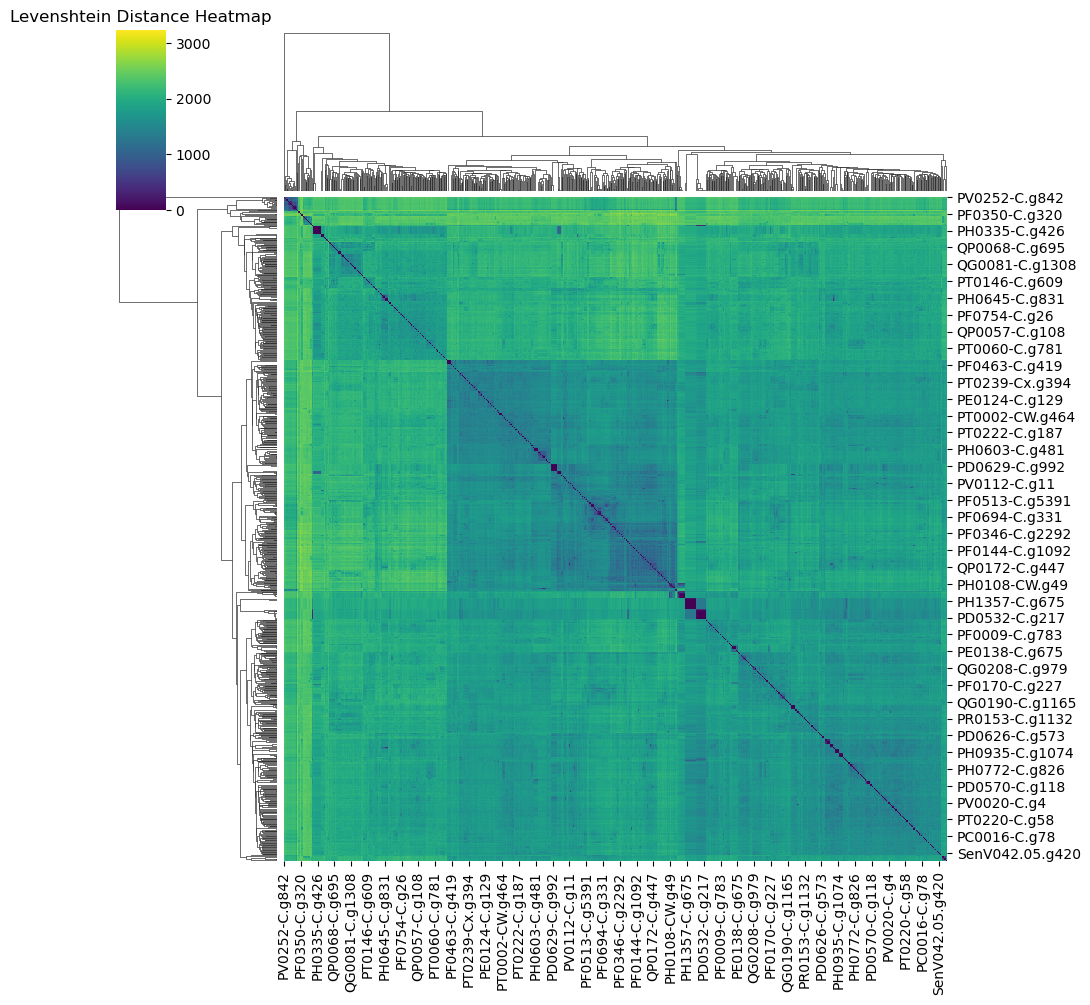

In [134]:
# Plot a clustermap of the Levenshtein distance matrix

plt.figure(figsize=(8, 6))

sns.clustermap(lev_matrix, cmap='viridis')
plt.title("Levenshtein Distance Heatmap")

plt.savefig("heatmap_clustered_dblb1.png")
plt.show()

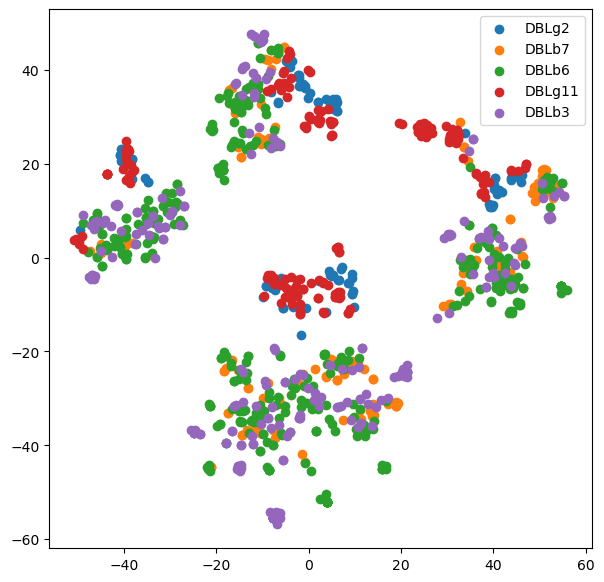

In [135]:
# t-SNE plot for DBLb1
tsne = TSNE(n_components=2, random_state=42) 
tsne_results = tsne.fit_transform(lev_matrix)

plt.figure(figsize=(7, 7))

#add labels (for different groups, can replace 'DC11_subtype' with any variable you are interested in)
for label in df_filtered['Domain_at_Position_4'].unique():
    index = (df_filtered['Domain_at_Position_4'] == label) 
    plt.scatter(tsne_results[index, 0], tsne_results[index, 1], label=label)

plt.legend()

plt.savefig("tSNE_plot_dblb1.png")
plt.show()

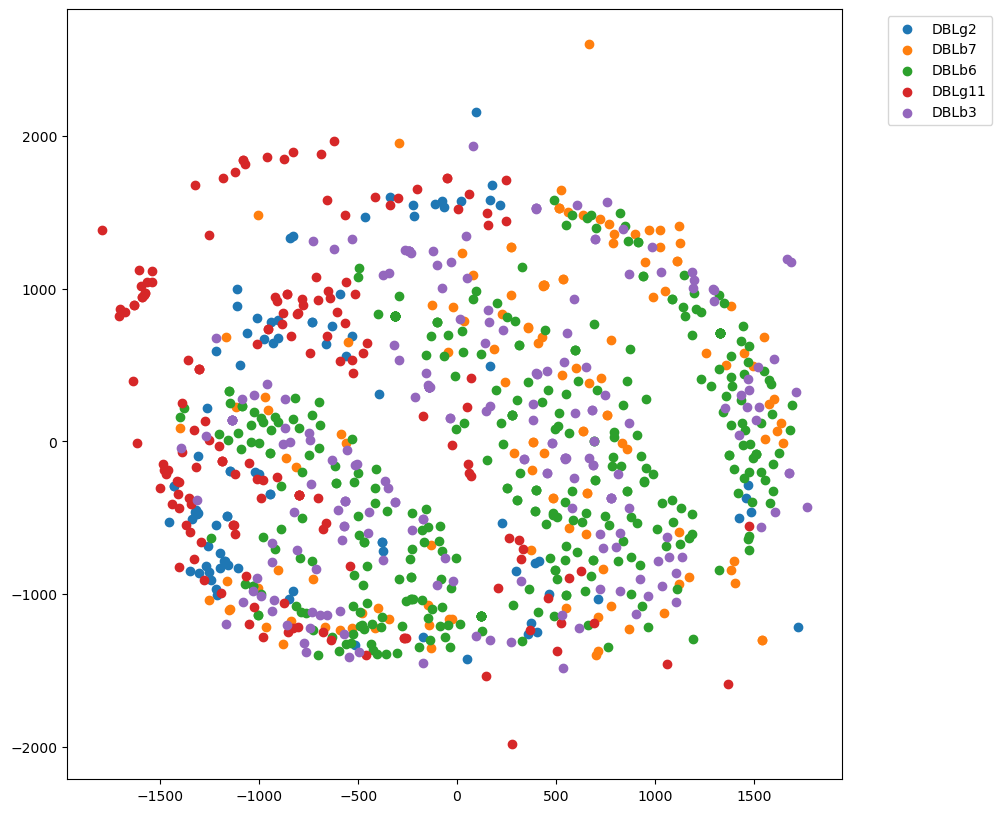

In [142]:

# MDS plot
mds = MDS(n_components=2, random_state=42, dissimilarity='precomputed',n_jobs=1, n_init = 1000, max_iter=1000) #n_copmonents designates the number of dimensions, random_state should always be set to the same number (e.g. 42) to ensure the results are reproducible, keep dissimilarity='precomputed' when using Levenshtein distances
mds_results = mds.fit_transform(lev_matrix)

plt.figure(figsize=(10, 10))

#add labels (for different groups, can replace 'DC11_subtype' with any variable you are interested in)
for label in df_filtered['Domain_at_Position_4'].unique():
    index = (df_filtered['Domain_at_Position_4'] == label) 
    plt.scatter(mds_results[index, 0], mds_results[index, 1], label=label)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("DC13_MDS_plot_Dblb1.png")
plt.show()

In [143]:
#create a new table for the MDS coordinates 
mds_df = pd.DataFrame(df_filtered['sequence_id']).sort_index() #we'll keep the sequence IDs from the df table

#3D coordinates
mds_3d = MDS(n_components=3, random_state=42, dissimilarity='precomputed', n_init = 200, max_iter=100) 

mds_results_3d = mds_3d.fit_transform(lev_matrix)

mds_df['mds_3d']=mds_results_3d.tolist()
mds_df['mds_3d_x']=mds_df['mds_3d'].apply(lambda a: a[0]) #take out the 1st coordinate
mds_df['mds_3d_y']=mds_df['mds_3d'].apply(lambda b: b[1]) #take out the 2nd coordinate
mds_df['mds_3d_z']=mds_df['mds_3d'].apply(lambda c: c[2]) #take out the 3rd coordinate

mds_df
mds_df.to_csv("DC13mds_df_DBLb1.csv")

In [109]:
#merge the MDS coordinates with our df
merged_df = df_filtered.merge(mds_df, on="sequence_id", how='right')

merged_df

,sequence_id,Genome,Study,Country,Region,Year,Accession,Database,Continent,Subtype,domain_structure,domain_count,Domain_at_Position_4,Subtype_at_Position_4,filename,sequence,mds_3d,mds_3d_x,mds_3d_y,mds_3d_z
0,10668.g605,10668,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLg2-DBLg6-DBLg11,6,DBLg2,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGTGSSTPSVPKDVKNESHKSARNILEGFAKDIKRDVSNEAQKRAY...,"[-187.16314361609628, -507.70212563471694, -11...",-187.163144,-507.702126,-1189.527782
1,6816.g324,6816,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg2-DBLd1...,8,DBLb7,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGGNSSKGAPTYYTNESEKSARNVLEGFAKDIRNKAENDAKKYASS...,"[584.1321925863903, 473.77666091554903, 1576.8...",584.132193,473.776661,1576.808160
2,8383.g469,8383,NaN,Kenya,NaN,NaN,ERS166381,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,7,DBLb7,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGGNSSKVAPTYFTNESHNSTRNVLEGLAKGIKEDIYKNAKKKGSS...,"[-1178.6476652360384, -43.439529047957066, 486...",-1178.647665,-43.439529,486.256530
3,Dd2-040005100,Dd2,Wellems_et_al_1988,SE_Asia,NaN,1988.0,GCA_900632045.1,PlasmoDB,Asia,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb6-DBLg11-DBLd1-CIDRg5-,7,DBLb6,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGGNSSKGAPTYYTNESEKSARNVLENFAKDIKGKASNDAKKKGIS...,"[-716.776946986096, 26.107760674007164, 900.65...",-716.776947,26.107761,900.658774
4,GA01-010005600,GA01,Otto_et_al_2018,Gabon,Lambarene,2007.0,GCA_900632005.1,PlasmoDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLg2-DBLg6-DBLg11-DBLd...,8,DBLg2,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGSSASKFSKIVVGNETHKSARNVLERYAESIKQQAAADAEKCEKS...,"[-717.8715256326484, 800.7578780892519, 980.42...",-717.871526,800.757878,980.425157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,SenT142.11.g1040,SenT142.11,Broad Senegal,Senegal,Thies,2011.0,SRS399575,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb9-DBLg2-DBLg17,6,DBLb9,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGGNASKFSKTVVGNETHKSARNVLERYAESIKQQAENDAKNYRSY...,"[-323.96856620683144, -282.423231728235, -706....",-323.968566,-282.423232,-706.225101
1136,SenT230.08.g292,SenT230.08,Broad Senegal,Senegal,Thies,2008.0,SRS119076,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb3-DBLg11-DBLg2-DBLd...,8,DBLb3,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGTGSSTPSVPKDVKNESHKSARNVLDVLAEDIKKQAENKAQKHAR...,"[972.7577187767612, 1114.149277963813, 464.570...",972.757719,1114.149278,464.570431
1137,SenV042.05.g324,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg2-DBLg4-DBLd1...,8,DBLb7,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,SSKVAPTYFTNESHNSTRNVLEGLAKGIKDDIYKNANKKRSSLKGN...,"[-599.6246637688507, 1529.1221087304705, -65.4...",-599.624664,1529.122109,-65.401764
1138,SenV042.05.g420,SenV042.05,Broad Senegal,Senegal,Velingara,2005.0,SRS119082,varDB,Africa,head structure with DBLb1,DBLa1.7-CIDRa1.4-DBLb1-DBLb7-DBLg11-DBLd1-CIDRb6,7,DBLb7,head structure with DBLb1,normalised.fulldataset_all_DC13_sequences_full...,MGGNASSFSKTVVGNETHKSARNILDVLAHDIRNKAENDAKNYASS...,"[1084.1800669205957, -81.78656214820305, 325.2...",1084.180067,-81.786562,325.293911


In [108]:
#save merged df
merged_df.to_csv("merged_df_DBla1.csv")

In [ ]:
#create 3D MDS plot
import plotly.io as pio
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
pio.renderers.default = "notebook"
merged_df = pd.read_csv("merged_df_notDBla1.csv")

fig = px.scatter_3d(merged_df, x="mds_3d_x", y="mds_3d_y", z="mds_3d_z",  hover_data=['sequence_id'], color = "Subtype",
                    color_discrete_sequence=px.colors.qualitative.Set1)


#choose camera angles (this is the view that will be used to save the image later)
camera = dict(
    eye=dict(x=1.25, y=1.25, z=0.5)
)

#change the appearance of the plot  
fig.update_layout(
width=1000,
height=700,
template='plotly_white',
scene=dict(
    aspectmode='cube'),
scene_camera=camera)

#change the data point size
fig.update_traces(marker_size=6)

#fig.write_image("MDS_3D_plot.png", width=1000, height=800, scale=3)
fig.show()
print(fig)
fig.write_html("DBlb1_3D_MDS_plot.html")